In [71]:
import pandas as pd 
import numpy as np

In [72]:
edad_mama=pd.read_csv("conjunto_de_datos_enr2023_csv/catalogos/edad_mama_registro.csv")
edad_papa=pd.read_csv("conjunto_de_datos_enr2023_csv/catalogos/edad_papa.csv")

In [82]:
data=pd.read_csv("conjunto_de_datos_enr2023_csv/conjunto_de_datos/conjunto_de_datos_enr2023.csv")

In [83]:
data.head()

,ent_regis,mun_regis,loc_regis,tloc_regis,ent_resid,mun_resid,loc_resid,tloc_resid,ent_ocurr,mun_ocurr,...,act_pad,pos_mad,pos_pad,sitlab_mad,sitlab_pad,fue_prese,hora_nac,minuto_nac,comparecio,dis_re_oax
0,1,1,1,15,1,1,9999,99,1,1,...,1,9,2,9,1,2,99,99,9,999
1,1,1,1,15,1,1,1,15,1,1,...,9,2,9,1,9,1,21,16,2,999
2,1,11,1,7,1,11,1,7,1,1,...,1,2,2,1,1,1,18,58,3,999
3,1,5,1,11,1,1,1,15,1,1,...,1,2,2,1,1,1,23,16,3,999
4,1,10,1,5,1,10,7777,1,1,1,...,1,9,2,3,1,1,16,40,3,999


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820888 entries, 0 to 1820887
Data columns (total 44 columns):
 #   Column      Dtype
---  ------      -----
 0   ent_regis   int64
 1   mun_regis   int64
 2   loc_regis   int64
 3   tloc_regis  int64
 4   ent_resid   int64
 5   mun_resid   int64
 6   loc_resid   int64
 7   tloc_resid  int64
 8   ent_ocurr   int64
 9   mun_ocurr   int64
 10  loc_ocurr   int64
 11  tloc_ocurr  int64
 12  sexo        int64
 13  edad_reg    int64
 14  edad_madn   int64
 15  edad_padn   int64
 16  dia_nac     int64
 17  mes_nac     int64
 18  ano_nac     int64
 19  dia_reg     int64
 20  mes_reg     int64
 21  ano_reg     int64
 22  edad_madr   int64
 23  edad_padr   int64
 24  tipo_nac    int64
 25  orden_part  int64
 26  lugar_part  int64
 27  q_atendio   int64
 28  hijos_vivo  int64
 29  hijos_sobr  int64
 30  edociv_mad  int64
 31  escol_mad   int64
 32  escol_pad   int64
 33  act_mad     int64
 34  act_pad     int64
 35  pos_mad     int64
 36  pos_pad 

In [ ]:
# Filter your DataFrame to include only the columns you need (as you did before)
data = data[['ent_resid', 'sexo', 'edad_reg', 'edad_madn', 'edad_padn', 'dia_nac', 'mes_nac', 'ano_nac']]

# Set display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Correct way to get unique values from the 'ent_resid' column
o1 = data['ent_resid'].unique()
print(o1)





[ 1 32 14 33 11 10 24 28 27 16  9 23  7  6 13 22 20  2 26 30  4 15  3 18
 25 19 12 17 29  8 21  5 31 35 34]


In [86]:
filtered_data = data[data['ent_resid']==1]
filtered_data.sample(n=10, random_state=2)

,ent_resid,sexo,edad_reg,edad_madn,edad_padn,dia_nac,mes_nac,ano_nac
9227,1,2,98,34,34,29,11,2023
1334,1,2,98,24,28,1,12,2023
12673,1,1,6,18,26,26,12,2016
847,1,1,98,30,36,2,12,2022
2036,1,1,98,99,99,28,9,2023
5444,1,1,98,31,28,2,2,2023
4146,1,1,98,22,23,23,10,2023
5554,1,1,98,21,41,21,10,2023
5938,1,1,98,27,25,22,11,2023
18763,1,1,98,30,30,28,7,2023


In [87]:
# --- CREAR LA COLUMNA DE FECHA ---
# Opción 1: Concatenar las columnas en formato de string 'YYYY-MM-DD' y luego convertir
# Es una forma robusta si tus columnas son numéricas
filtered_data['fecha_nacimiento'] = pd.to_datetime(
    filtered_data['ano_nac'].astype(str) + '-' +
    filtered_data['mes_nac'].astype(str) + '-' +
    filtered_data['dia_nac'].astype(str),
    errors='coerce' # 'coerce' convertirá los valores inválidos a NaT (Not a Time)
)
filtered_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_15736\3283132485.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_data['fecha_nacimiento'] = pd.to_datetime(
C:\Users\User\AppData\Local\Temp\ipykernel_15736\3283132485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['fecha_nacimiento'] = pd.to_datetime(


,ent_resid,sexo,edad_reg,edad_madn,edad_padn,dia_nac,mes_nac,ano_nac,fecha_nacimiento
0,1,2,99,99,99,99,99,9999,NaT
1,1,2,1,21,99,19,3,2021,2021-03-19
2,1,1,98,32,33,4,3,2023,2023-03-04
3,1,1,98,29,33,6,3,2023,2023-03-06
4,1,1,98,33,99,22,3,2023,2023-03-22


In [88]:
# Reemplazar 98 y 99 en las columnas de edad
filtered_data['edad_reg'] = filtered_data['edad_reg'].replace({98: np.nan, 99: np.nan})
filtered_data['edad_madn'] = filtered_data['edad_madn'].replace({98: np.nan, 99: np.nan})
filtered_data['edad_padn'] = filtered_data['edad_padn'].replace({98: np.nan, 99: np.nan})
filtered_data['dia_nac'] = filtered_data['dia_nac'].replace({98: np.nan, 99: np.nan})
filtered_data['mes_nac'] = filtered_data['mes_nac'].replace({98: np.nan, 99: np.nan})
filtered_data['ano_nac'] = filtered_data['ano_nac'].replace({9999: np.nan, 9999: np.nan})
filtered_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_15736\1831044666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['edad_reg'] = filtered_data['edad_reg'].replace({98: np.nan, 99: np.nan})
C:\Users\User\AppData\Local\Temp\ipykernel_15736\1831044666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['edad_madn'] = filtered_data['edad_madn'].replace({98: np.nan, 99: np.nan})
C:\Users\User\AppData\Local\Temp\ipykernel_15736\1831044666.py:4: SettingWithCopyWarning: 
A value is trying t

,ent_resid,sexo,edad_reg,edad_madn,edad_padn,dia_nac,mes_nac,ano_nac,fecha_nacimiento
0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1,2,1,21,NaN,19,3,2021,2021-03-19
2,1,1,NaN,32,33,4,3,2023,2023-03-04
3,1,1,NaN,29,33,6,3,2023,2023-03-06
4,1,1,NaN,33,NaN,22,3,2023,2023-03-22


In [93]:
filtered_data['dif_edad']=filtered_data['edad_padn']-filtered_data['edad_madn']
filtered_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_15736\2269512453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['dif_edad']=filtered_data['edad_padn']-filtered_data['edad_madn']


,ent_resid,sexo,edad_reg,edad_madn,edad_padn,dia_nac,mes_nac,ano_nac,fecha_nacimiento,dif_edad
0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,1,2,1,21,NaN,19,3,2021,2021-03-19,NaN
2,1,1,NaN,32,33,4,3,2023,2023-03-04,1
3,1,1,NaN,29,33,6,3,2023,2023-03-06,4
4,1,1,NaN,33,NaN,22,3,2023,2023-03-22,NaN


In [100]:
# --- CALCULAR Y MOSTRAR LAS ESTADÍSTICAS ---

print("--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---")
promedio_edad_padn = filtered_data['edad_padn'].mean()
min_edad_padn = filtered_data['edad_padn'].min()
max_edad_padn = filtered_data['edad_padn'].max()
count_edad_padn = filtered_data['edad_padn'].count() # Para saber cuántos valores se usaron

print(f"  Promedio: {promedio_edad_padn:.2f} años")
print(f"  Mínimo: {min_edad_padn:.0f} años") # .0f para mostrar enteros, ya que las edades suelen serlo
print(f"  Máximo: {max_edad_padn:.0f} años")
print(f"  Número de valores válidos: {count_edad_padn}")

print("\n--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---")
promedio_edad_madn = filtered_data['edad_madn'].mean()
min_edad_madn = filtered_data['edad_madn'].min()
max_edad_madn = filtered_data['edad_madn'].max()
count_edad_madn = filtered_data['edad_madn'].count() # Para saber cuántos valores se usaron

print(f"  Promedio: {promedio_edad_madn:.2f} años")
print(f"  Mínimo: {min_edad_madn:.0f} años")
print(f"  Máximo: {max_edad_madn:.0f} años")
print(f"  Número de valores válidos: {count_edad_madn}")

# Alternativa rápida y completa para ambas columnas
print("\n--- Resumen rápido con .describe() para ambas edades ---")
print(filtered_data[['edad_padn', 'edad_madn']].describe())

--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.32 años
  Mínimo: 14 años
  Máximo: 75 años
  Número de valores válidos: 16055

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.40 años
  Mínimo: 13 años
  Máximo: 50 años
  Número de valores válidos: 18506

--- Resumen rápido con .describe() para ambas edades ---
       edad_padn  edad_madn
count      16055      18506
mean          29         26
std            8          6
min           14         13
25%           24         21
50%           29         26
75%           34         31
max           75         50


In [107]:
federal_entities = {
    1: "Aguascalientes",
    2: "Baja California",
    3: "Baja California Sur",
    4: "Campeche",
    5: "Coahuila de Zaragoza",
    6: "Colima",
    7: "Chiapas",
    8: "Chihuahua",
    9: "Ciudad de México",
    10: "Durango",
    11: "Guanajuato",
    12: "Guerrero",
    13: "Hidalgo",
    14: "Jalisco",
    15: "Edo. de México",
    16: "Michoacán de Ocampo",
    17: "Morelos",
    18: "Nayarit",
    19: "Nuevo León",
    20: "Oaxaca",
    21: "Puebla",
    22: "Querétaro",
    23: "Quintana Roo",
    24: "San Luis Potosí",
    25: "Sinaloa",
    26: "Sonora",
    27: "Tabasco",
    28: "Tamaulipas",
    29: "Tlaxcala",
    30: "Veracruz de Ignacio de la Llave",
    31: "Yucatán",
    32: "Zacatecas",
    33: "Nacional",
    34: "Extranjero"
}

In [101]:

# --- 1. Encontrar la fila completa con la máxima 'edad_padn' ---

# idxmax() devuelve el índice de la primera aparición del valor máximo
# Manejar el caso donde la columna podría estar toda con NaN (sin máximos)
if not filtered_data['edad_padn'].dropna().empty:
    idx_max_edad_padn = filtered_data['edad_padn'].idxmax()

    # Usar .loc para obtener la fila completa en ese índice
    fila_max_edad_padn = filtered_data.loc[idx_max_edad_padn]

    print("\n--- Fila con la máxima 'edad_padn' ---")
    print(fila_max_edad_padn)

    # Para obtener solo la 'edad_madn' de esa fila:
    edad_madn_con_max_padn = fila_max_edad_padn['edad_madn']
    # Manejar el caso donde edad_madn también podría ser NaN en esa fila
    if pd.isna(edad_madn_con_max_padn):
        print(f"\nLa edad de la madre asociada a la máxima edad del padre es: No disponible (NaN)")
    else:
        print(f"\nLa edad de la madre asociada a la máxima edad del padre es: {edad_madn_con_max_padn:.0f} años")
else:
    print("\nNo hay datos válidos para 'edad_padn' para calcular el máximo.")


# --- 2. Encontrar la fila completa con la mínima 'edad_madn' ---

# idxmin() devuelve el índice de la primera aparición del valor mínimo
# Manejar el caso donde la columna podría estar toda con NaN (sin mínimos)
if not filtered_data['edad_madn'].dropna().empty:
    idx_min_edad_madn = filtered_data['edad_madn'].idxmin()

    # Usar .loc para obtener la fila completa en ese índice
    fila_min_edad_madn = filtered_data.loc[idx_min_edad_madn]

    print("\n--- Fila con la mínima 'edad_madn' ---")
    print(fila_min_edad_madn)

    # Para obtener solo la 'edad_padn' de esa fila:
    edad_padn_con_min_madn = fila_min_edad_madn['edad_padn'] # CORREGIDO: Usar min_edad_madn, no max_edad_madn
    # Manejar el caso donde edad_padn también podría ser NaN en esa fila
    if pd.isna(edad_padn_con_min_madn):
        print(f"\nLa edad del padre asociada a la mínima edad de la madre es: No disponible (NaN)")
    else:
        print(f"\nLa edad del padre asociada a la mínima edad de la madre es: {edad_padn_con_min_madn:.0f} años")
else:
    print("\nNo hay datos válidos para 'edad_madn' para calcular el mínimo.")


# --- 3. En caso de múltiples ocurrencias del valor extremo (si hay empates) ---

# --- Para la máxima 'edad_padn' (tal como lo tenías, que está bien) ---
if not filtered_data['edad_padn'].dropna().empty:
    max_val_edad_padn = filtered_data['edad_padn'].max()
    filas_con_max_edad_padn = filtered_data[filtered_data['edad_padn'] == max_val_edad_padn]

    print("\n--- Todas las filas con la máxima 'edad_padn' (en caso de empates) ---")
    print(filas_con_max_edad_padn[['edad_padn', 'edad_madn']])
else:
    print("\nNo se pudieron encontrar filas con la máxima 'edad_padn' debido a la falta de datos.")


# --- Para la mínima 'edad_madn' (CORREGIDO aquí para usar .min() y el nombre de variable correcto) ---
if not filtered_data['edad_madn'].dropna().empty:
    min_val_edad_madn = filtered_data['edad_madn'].min() # <-- CORREGIDO: Usar .min()
    filas_con_min_edad_madn = filtered_data[filtered_data['edad_madn'] == min_val_edad_madn] # <-- CORREGIDO: Usar min_val_edad_madn

    print("\n--- Todas las filas con la mínima 'edad_madn' (en caso de empates) ---")
    print(filas_con_min_edad_madn[['edad_padn', 'edad_madn']])
else:
    print("\nNo se pudieron encontrar filas con la mínima 'edad_madn' debido a la falta de datos.")


--- Fila con la máxima 'edad_padn' ---
ent_resid                             1
sexo                                  1
edad_reg                            NaN
edad_madn                            33
edad_padn                            75
dia_nac                              27
mes_nac                               9
ano_nac                            2023
fecha_nacimiento    2023-09-27 00:00:00
dif_edad                             42
Name: 8687, dtype: object

La edad de la madre asociada a la máxima edad del padre es: 33 años

--- Fila con la mínima 'edad_madn' ---
ent_resid                             1
sexo                                  2
edad_reg                            NaN
edad_madn                            13
edad_padn                            16
dia_nac                              23
mes_nac                               4
ano_nac                            2023
fecha_nacimiento    2023-04-23 00:00:00
dif_edad                              3
Name: 397, dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['fecha_nacimiento'] = pd.to_datetime(



--- Entidad Federativa: Aguascalientes ---
--- Promedio de Diferencia de Edad (Padre - Madre): 11.21 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.30 años
  Mínimo: 14 años
  Máximo: 75 años
  Número de valores válidos: 15890

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.39 años
  Mínimo: 13 años
  Máximo: 50 años
  Número de valores válidos: 18324

--- Distribución de Nacimientos por Mes para Aguascalientes ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Aguascalientes.png

--- Entidad Federativa: Baja California ---
--- Promedio de Diferencia de Edad (Padre - Madre): 8.28 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.10 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 47000

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.66 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 51942

--- Distribución de Nacimientos por Mes para Baja California ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Baja California.png

--- Entidad Federativa: Baja California Sur ---
--- Promedio de Diferencia de Edad (Padre - Madre): 9.11 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.04 años
  Mínimo: 12 años
  Máximo: 74 años
  Número de valores válidos: 9456

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.77 años
  Mínimo: 12 años
  Máximo: 50 años
  Número de valores válidos: 10348

--- Distribución de Nacimientos por Mes para Baja California Sur ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Baja California Sur.png

--- Entidad Federativa: Campeche ---
--- Promedio de Diferencia de Edad (Padre - Madre): 11.00 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.31 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 11401

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.53 años
  Mínimo: 12 años
  Máximo: 50 años
  Número de valores válidos: 12843

--- Distribución de Nacimientos por Mes para Campeche ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Campeche.png

--- Entidad Federativa: Coahuila ---
--- Promedio de Diferencia de Edad (Padre - Madre): 6.76 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.03 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 32534

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.06 años
  Mínimo: 11 años
  Máximo: 50 años
  Número de valores válidos: 35305

--- Distribución de Nacimientos por Mes para Coahuila ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Coahuila.png

--- Entidad Federativa: Colima ---
--- Promedio de Diferencia de Edad (Padre - Madre): 10.16 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.63 años
  Mínimo: 14 años
  Máximo: 73 años
  Número de valores válidos: 8156

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.81 años
  Mínimo: 12 años
  Máximo: 48 años
  Número de valores válidos: 9007

--- Distribución de Nacimientos por Mes para Colima ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Colima.png

--- Entidad Federativa: Chiapas ---
--- Promedio de Diferencia de Edad (Padre - Madre): 9.50 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.36 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 109492

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.34 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 123190

--- Distribución de Nacimientos por Mes para Chiapas ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Chiapas.png

--- Entidad Federativa: Chihuahua ---
--- Promedio de Diferencia de Edad (Padre - Madre): 9.96 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.16 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 38840

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 25.77 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 43923

--- Distribución de Nacimientos por Mes para Chihuahua ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Chihuahua.png

--- Entidad Federativa: Ciudad de México ---
--- Promedio de Diferencia de Edad (Padre - Madre): 9.05 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 31.54 años
  Mínimo: 13 años
  Máximo: 75 años
  Número de valores válidos: 66618

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 28.19 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 74557

--- Distribución de Nacimientos por Mes para Ciudad de México ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Ciudad de México.png

--- Entidad Federativa: Durango ---
--- Promedio de Diferencia de Edad (Padre - Madre): 7.06 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.61 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 19760

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.17 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 21694

--- Distribución de Nacimientos por Mes para Durango ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Durango.png

--- Entidad Federativa: Guanajuato ---
--- Promedio de Diferencia de Edad (Padre - Madre): 11.45 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.43 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 79927

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.51 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 91292

--- Distribución de Nacimientos por Mes para Guanajuato ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Guanajuato.png

--- Entidad Federativa: Guerrero ---
--- Promedio de Diferencia de Edad (Padre - Madre): 7.03 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.98 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 48933

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.21 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 52632

--- Distribución de Nacimientos por Mes para Guerrero ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Guerrero.png

--- Entidad Federativa: Hidalgo ---
--- Promedio de Diferencia de Edad (Padre - Madre): 8.05 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.10 años
  Mínimo: 13 años
  Máximo: 75 años
  Número de valores válidos: 28429

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.55 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 31110

--- Distribución de Nacimientos por Mes para Hidalgo ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Hidalgo.png

--- Entidad Federativa: Jalisco ---
--- Promedio de Diferencia de Edad (Padre - Madre): 8.98 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.19 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 112046

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.76 años
  Mínimo: 11 años
  Máximo: 50 años
  Número de valores válidos: 122847

--- Distribución de Nacimientos por Mes para Jalisco ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Jalisco.png

--- Entidad Federativa: Edo. de México ---
--- Promedio de Diferencia de Edad (Padre - Madre): 10.65 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.41 años
  Mínimo: 13 años
  Máximo: 75 años
  Número de valores válidos: 181712

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.26 años
  Mínimo: 11 años
  Máximo: 50 años
  Número de valores válidos: 204287

--- Distribución de Nacimientos por Mes para Edo. de México ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Edo. de México.png

--- Entidad Federativa: Michoacán ---
--- Promedio de Diferencia de Edad (Padre - Madre): 9.45 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.02 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 68590

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.49 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 75385

--- Distribución de Nacimientos por Mes para Michoacán ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Michoacán.png

--- Entidad Federativa: Morelos ---
--- Promedio de Diferencia de Edad (Padre - Madre): 10.54 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.06 años
  Mínimo: 14 años
  Máximo: 75 años
  Número de valores válidos: 20191

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.46 años
  Mínimo: 11 años
  Máximo: 50 años
  Número de valores válidos: 22755

--- Distribución de Nacimientos por Mes para Morelos ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Morelos.png

--- Entidad Federativa: Nayarit ---
--- Promedio de Diferencia de Edad (Padre - Madre): 10.10 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.60 años
  Mínimo: 13 años
  Máximo: 75 años
  Número de valores válidos: 16130

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.60 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 18003

--- Distribución de Nacimientos por Mes para Nayarit ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Nayarit.png

--- Entidad Federativa: Nuevo León ---
--- Promedio de Diferencia de Edad (Padre - Madre): 8.63 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.90 años
  Mínimo: 13 años
  Máximo: 72 años
  Número de valores válidos: 63083

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 27.01 años
  Mínimo: 12 años
  Máximo: 50 años
  Número de valores válidos: 70084

--- Distribución de Nacimientos por Mes para Nuevo León ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Nuevo León.png

--- Entidad Federativa: Oaxaca ---
--- Promedio de Diferencia de Edad (Padre - Madre): 10.87 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.39 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 59446

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.46 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 66540

--- Distribución de Nacimientos por Mes para Oaxaca ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Oaxaca.png

--- Entidad Federativa: Puebla ---
--- Promedio de Diferencia de Edad (Padre - Madre): 8.70 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.32 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 87529

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.05 años
  Mínimo: 11 años
  Máximo: 50 años
  Número de valores válidos: 96568

--- Distribución de Nacimientos por Mes para Puebla ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


Gráfica guardada como: graficas/Puebla.png

--- Entidad Federativa: Querétaro ---
--- Promedio de Diferencia de Edad (Padre - Madre): 9.96 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.37 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 27652

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 27.33 años
  Mínimo: 13 años
  Máximo: 50 años
  Número de valores válidos: 30773

--- Distribución de Nacimientos por Mes para Querétaro ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Querétaro.png

--- Entidad Federativa: Quintana Roo ---
--- Promedio de Diferencia de Edad (Padre - Madre): 8.23 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.70 años
  Mínimo: 14 años
  Máximo: 75 años
  Número de valores válidos: 18192

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.89 años
  Mínimo: 11 años
  Máximo: 50 años
  Número de valores válidos: 20105

--- Distribución de Nacimientos por Mes para Quintana Roo ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Quintana Roo.png

--- Entidad Federativa: San Luis Potosí ---
--- Promedio de Diferencia de Edad (Padre - Madre): 10.41 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.05 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 34986

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.81 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 39300

--- Distribución de Nacimientos por Mes para San Luis Potosí ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/San Luis Potosí.png

--- Entidad Federativa: Sinaloa ---
--- Promedio de Diferencia de Edad (Padre - Madre): 10.78 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.57 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 35700

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.98 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 40656

--- Distribución de Nacimientos por Mes para Sinaloa ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Sinaloa.png

--- Entidad Federativa: Sonora ---
--- Promedio de Diferencia de Edad (Padre - Madre): 10.90 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.90 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 34650

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.38 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 38899

--- Distribución de Nacimientos por Mes para Sonora ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Sonora.png

--- Entidad Federativa: Tabasco ---
--- Promedio de Diferencia de Edad (Padre - Madre): 9.55 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.51 años
  Mínimo: 13 años
  Máximo: 75 años
  Número de valores válidos: 29067

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.30 años
  Mínimo: 12 años
  Máximo: 50 años
  Número de valores válidos: 32241

--- Distribución de Nacimientos por Mes para Tabasco ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Tabasco.png

--- Entidad Federativa: Tamaulipas ---
--- Promedio de Diferencia de Edad (Padre - Madre): 9.61 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.93 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 38182

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.47 años
  Mínimo: 12 años
  Máximo: 50 años
  Número de valores válidos: 42326

--- Distribución de Nacimientos por Mes para Tamaulipas ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Tamaulipas.png

--- Entidad Federativa: Tlaxcala ---
--- Promedio de Diferencia de Edad (Padre - Madre): 7.16 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.12 años
  Mínimo: 14 años
  Máximo: 75 años
  Número de valores válidos: 12262

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.02 años
  Mínimo: 10 años
  Máximo: 49 años
  Número de valores válidos: 13594

--- Distribución de Nacimientos por Mes para Tlaxcala ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Tlaxcala.png

--- Entidad Federativa: Veracruz ---
--- Promedio de Diferencia de Edad (Padre - Madre): 10.83 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 30.29 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 85831

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.33 años
  Mínimo: 11 años
  Máximo: 50 años
  Número de valores válidos: 95928

--- Distribución de Nacimientos por Mes para Veracruz ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Veracruz.png

--- Entidad Federativa: Yucatán ---
--- Promedio de Diferencia de Edad (Padre - Madre): 8.30 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.76 años
  Mínimo: 13 años
  Máximo: 75 años
  Número de valores válidos: 24150

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.82 años
  Mínimo: 11 años
  Máximo: 50 años
  Número de valores válidos: 26205

--- Distribución de Nacimientos por Mes para Yucatán ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Yucatán.png

--- Entidad Federativa: Zacatecas ---
--- Promedio de Diferencia de Edad (Padre - Madre): 6.59 años ---
--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---
  Promedio: 29.84 años
  Mínimo: 12 años
  Máximo: 75 años
  Número de valores válidos: 19113

--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---
  Promedio: 26.75 años
  Mínimo: 10 años
  Máximo: 50 años
  Número de valores válidos: 20593

--- Distribución de Nacimientos por Mes para Zacatecas ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\2692292299.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


Gráfica guardada como: graficas/Zacatecas.png


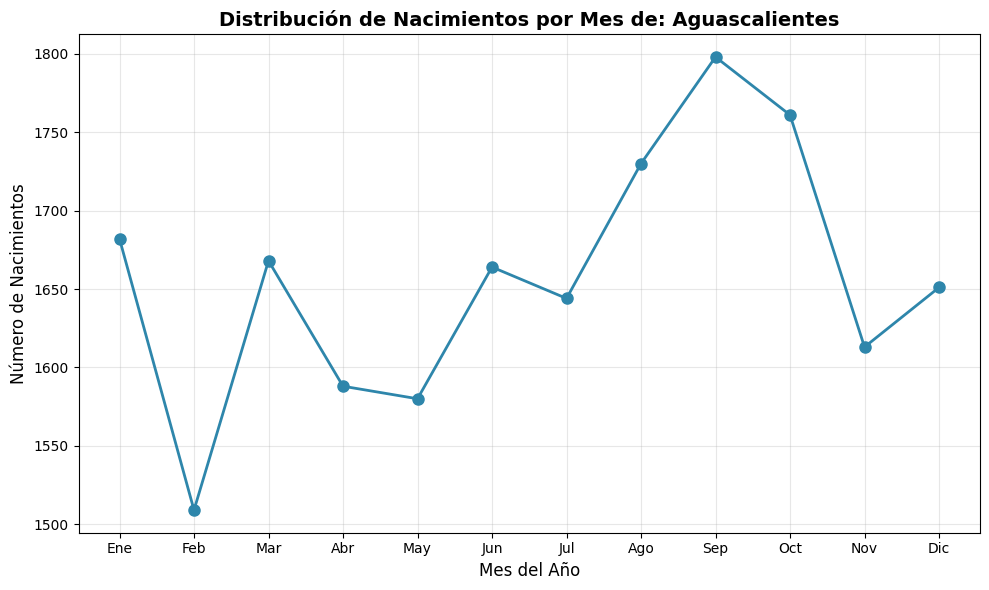

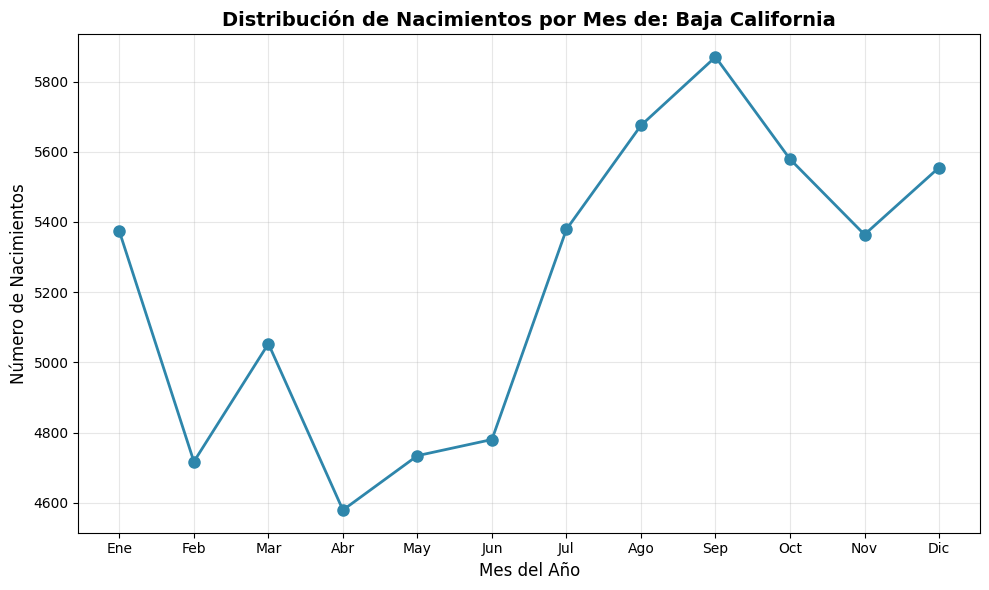

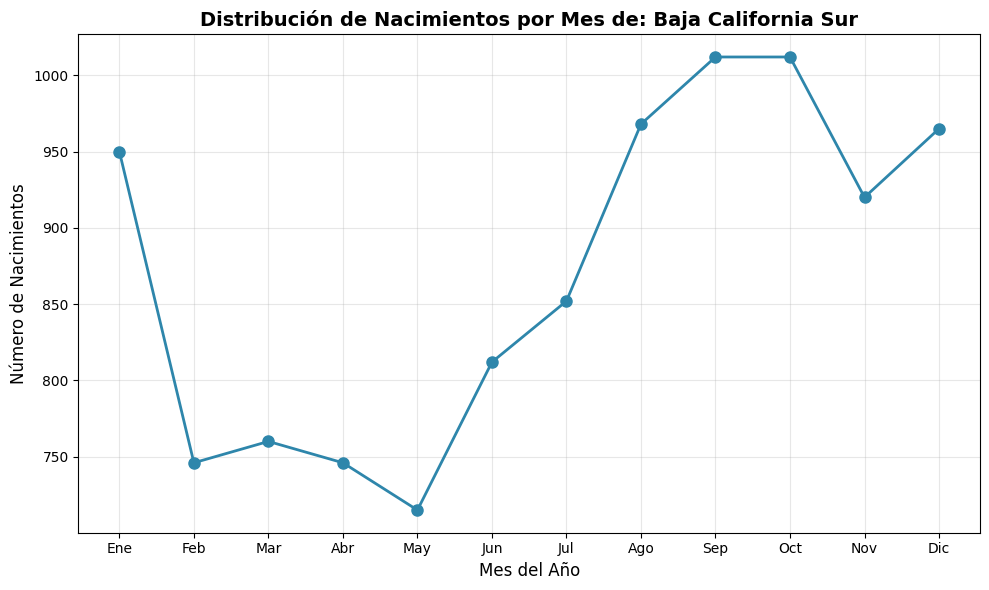

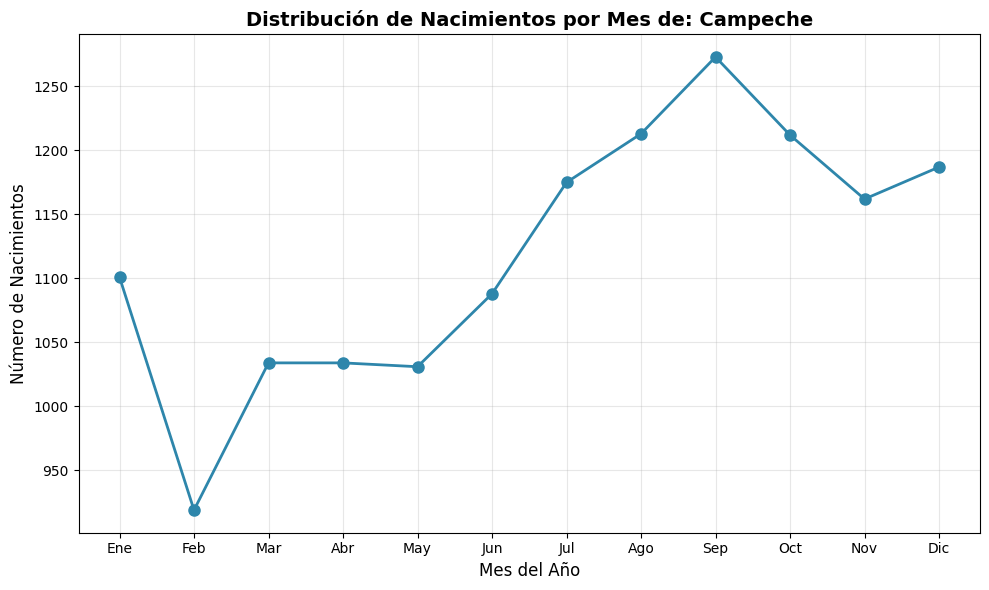

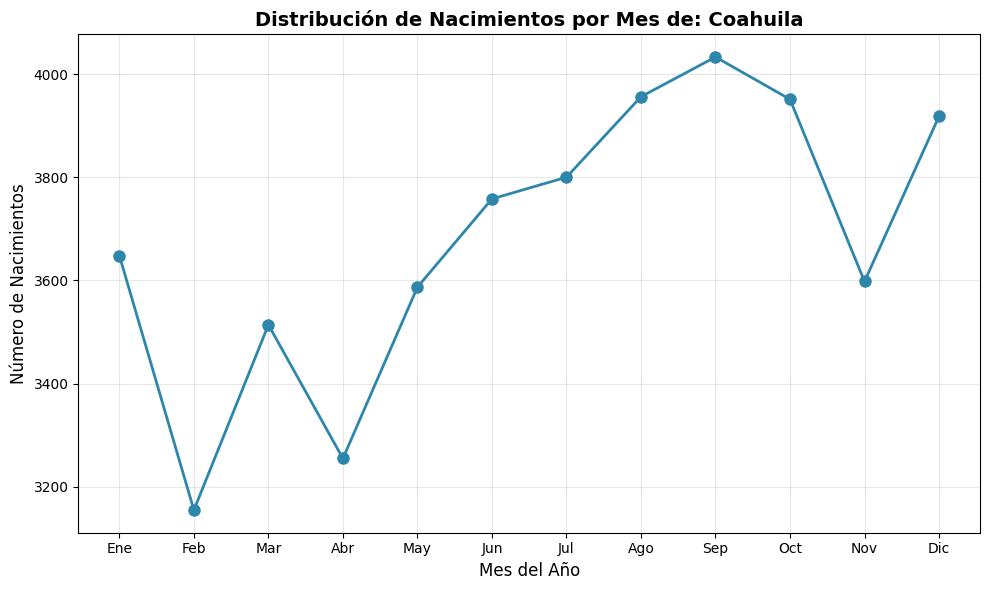

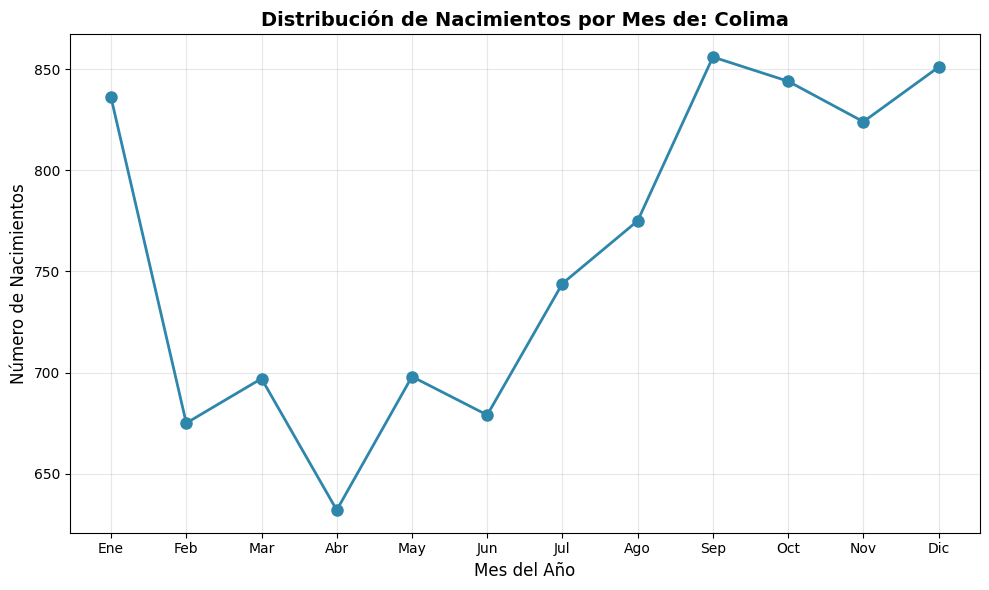

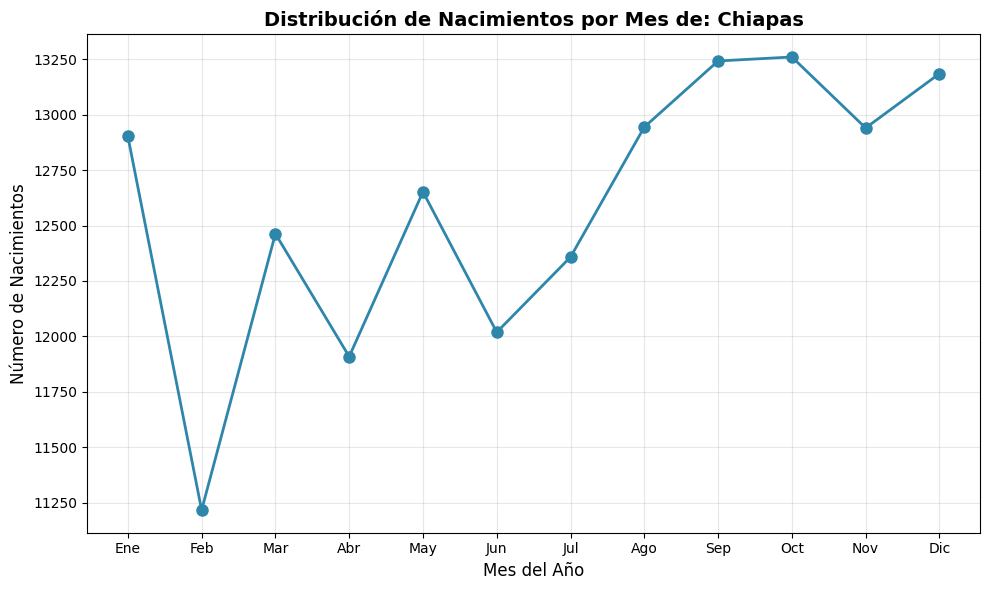

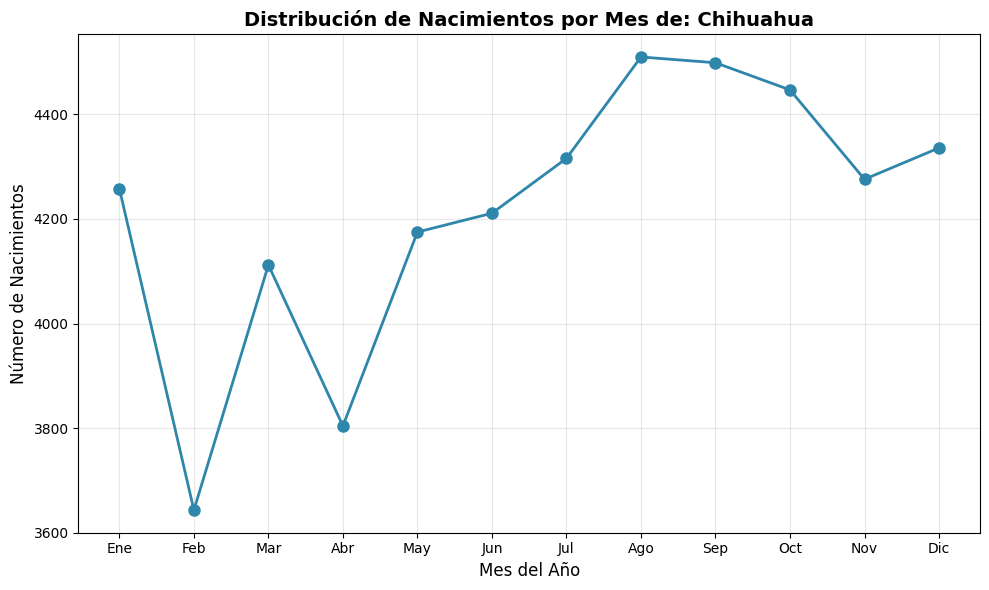

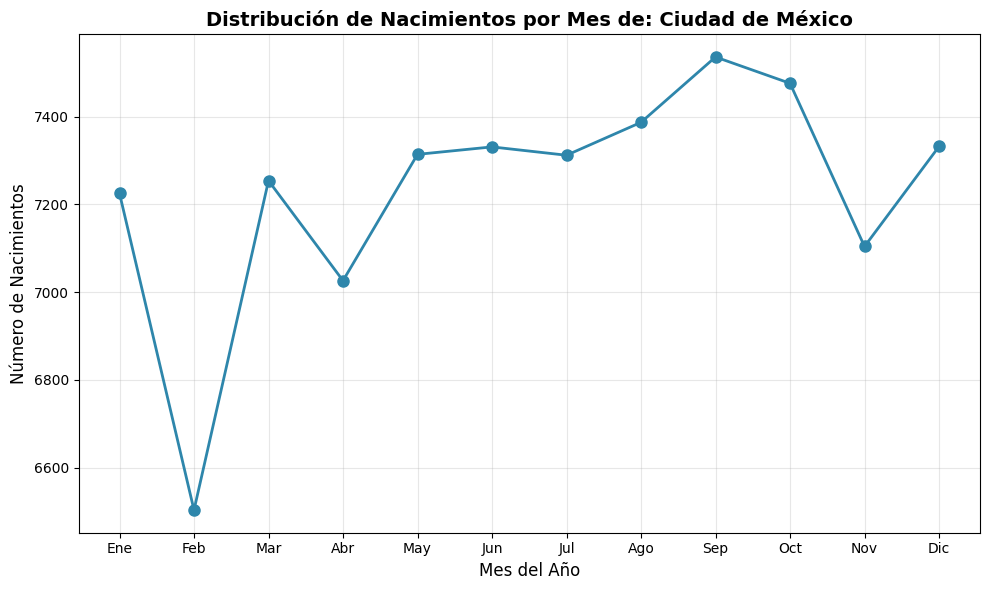

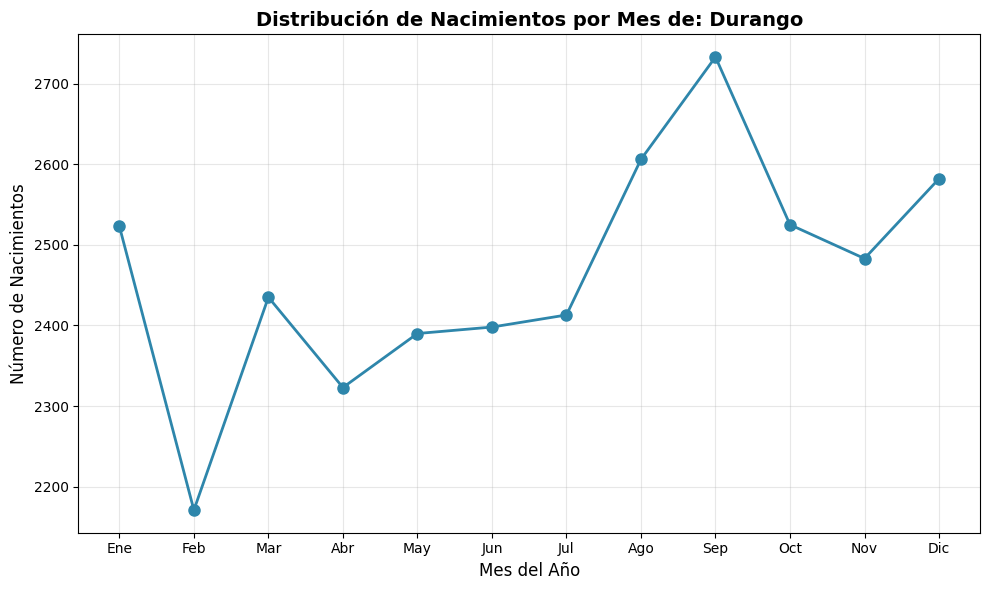

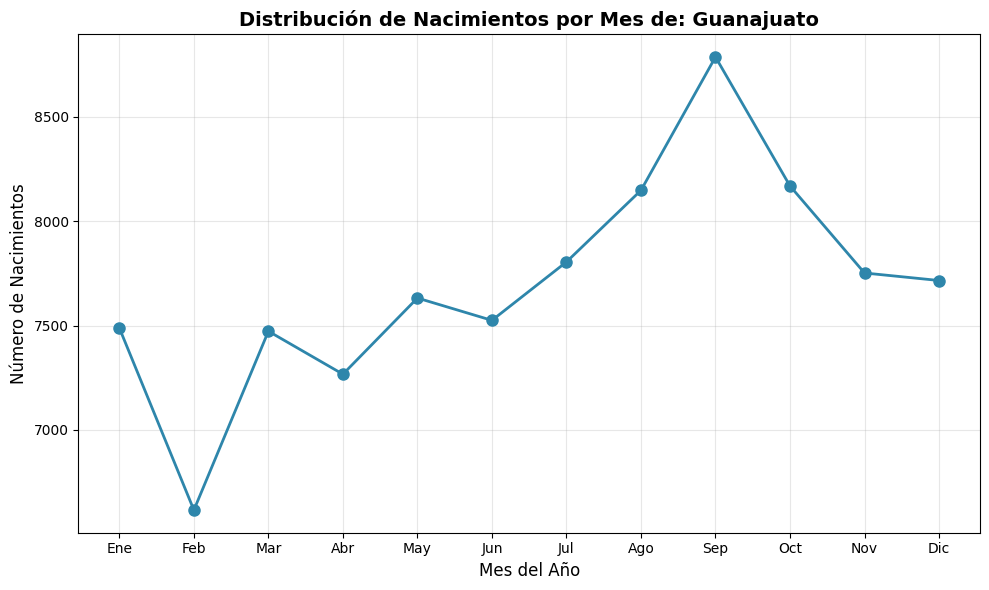

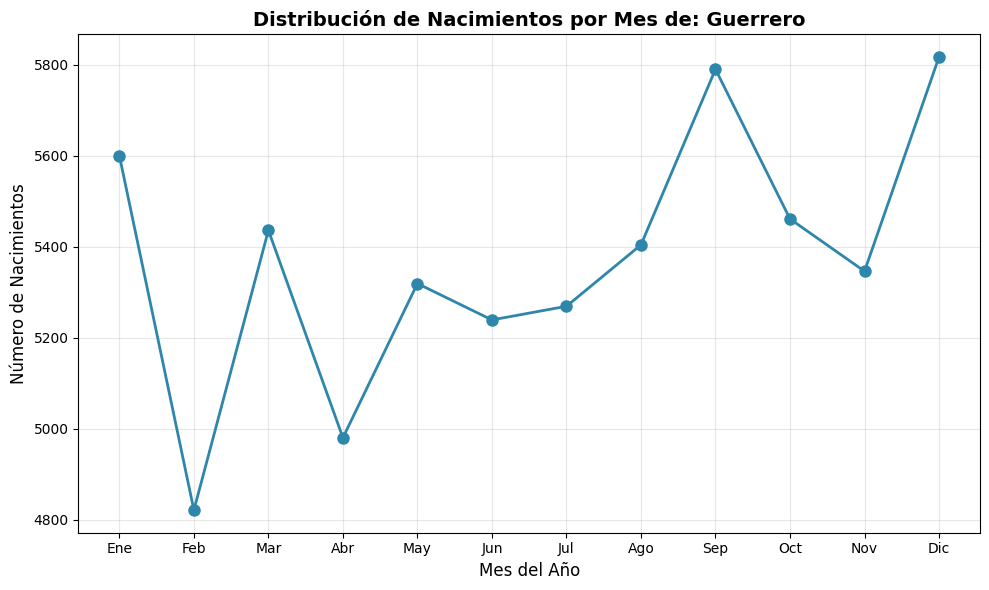

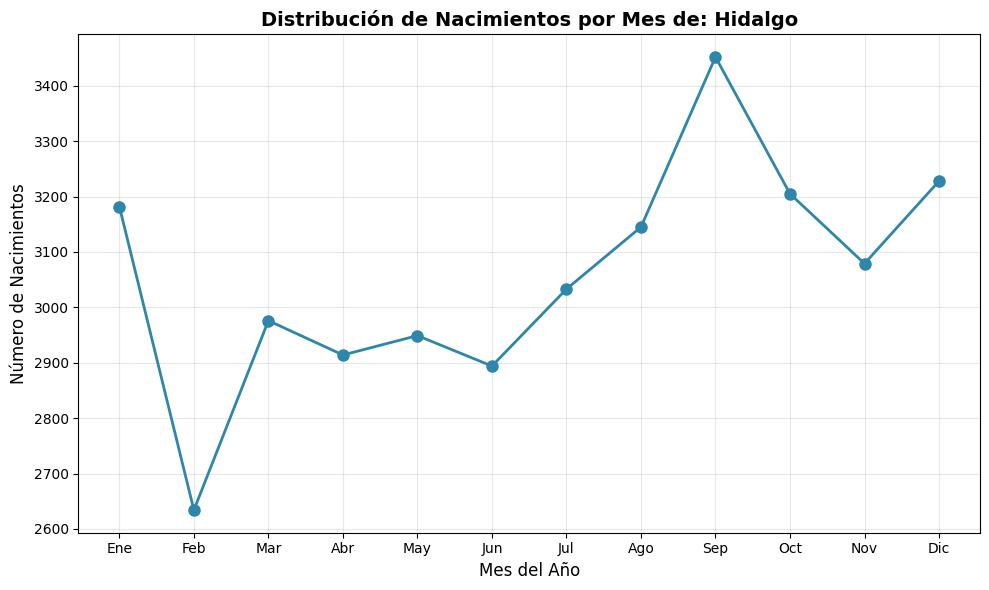

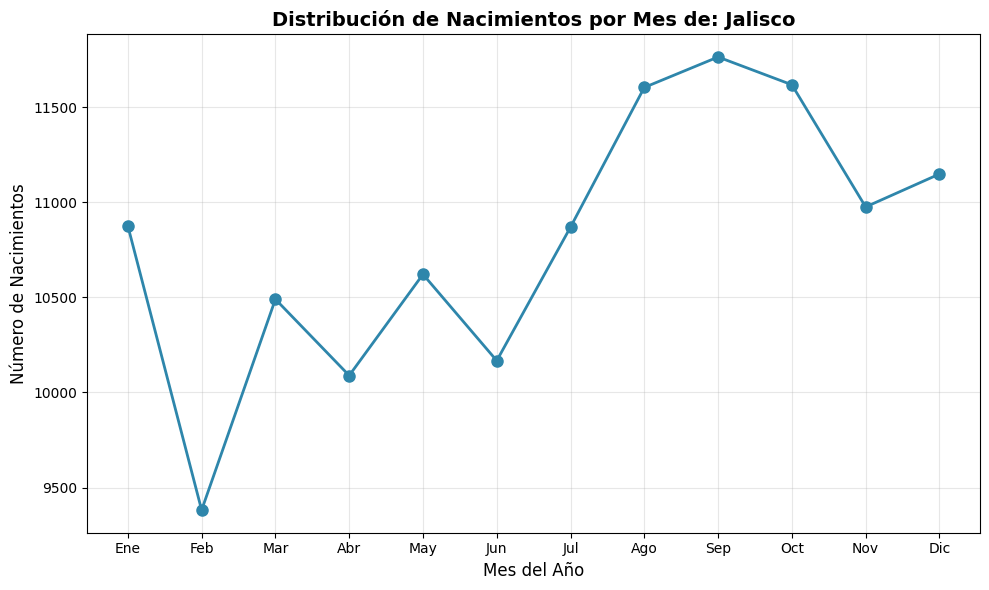

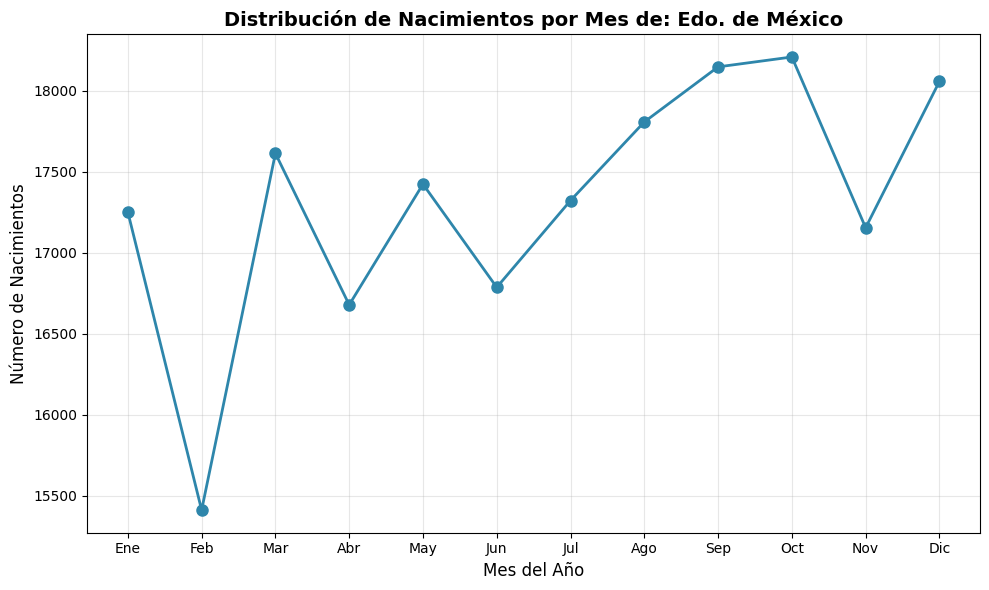

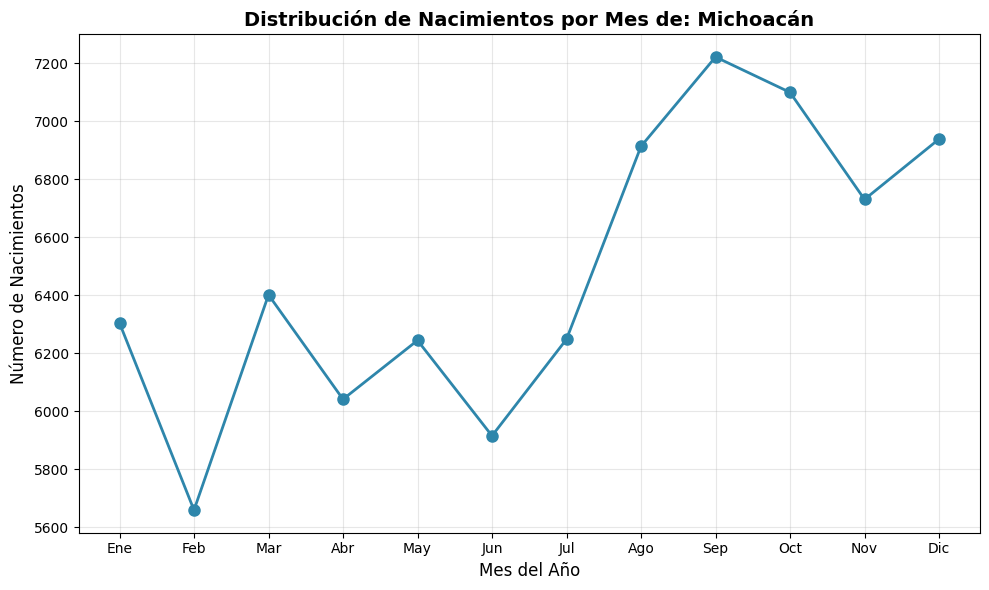

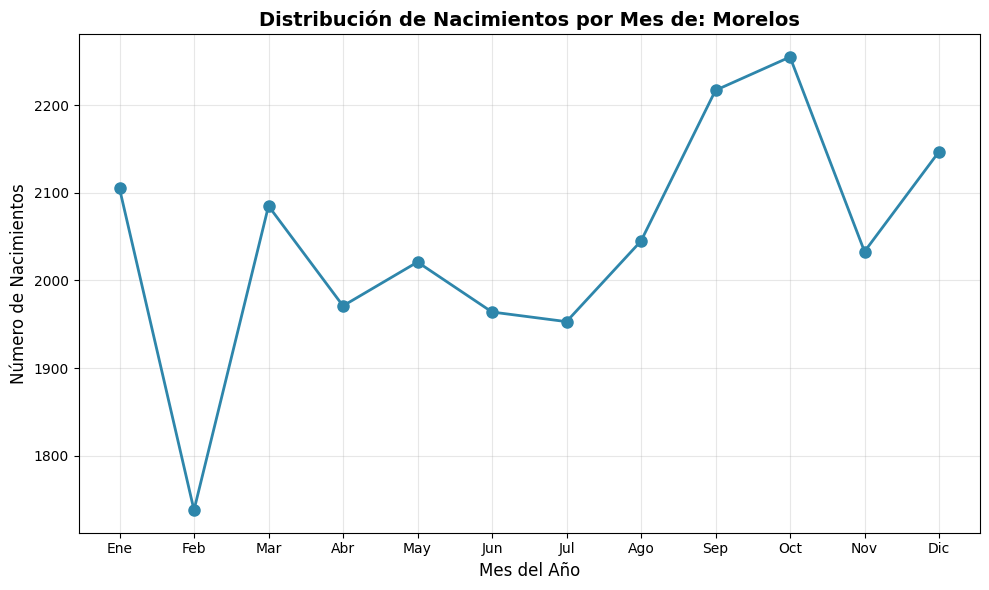

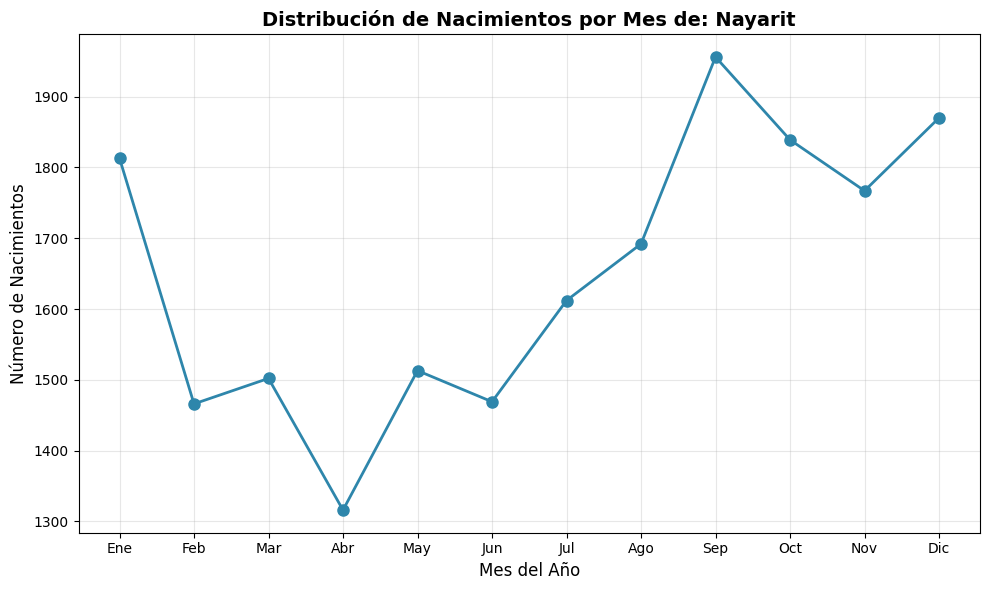

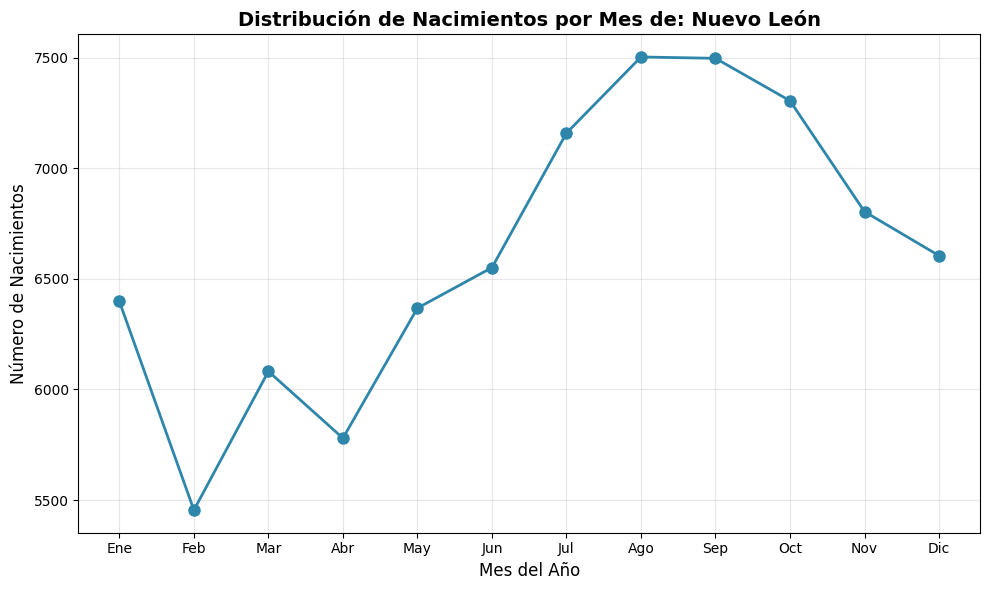

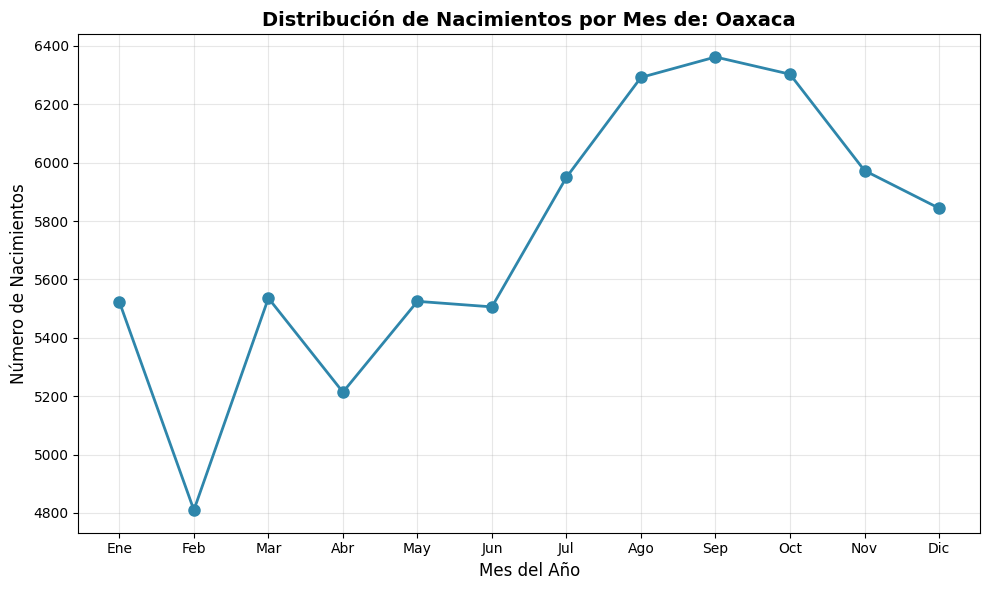

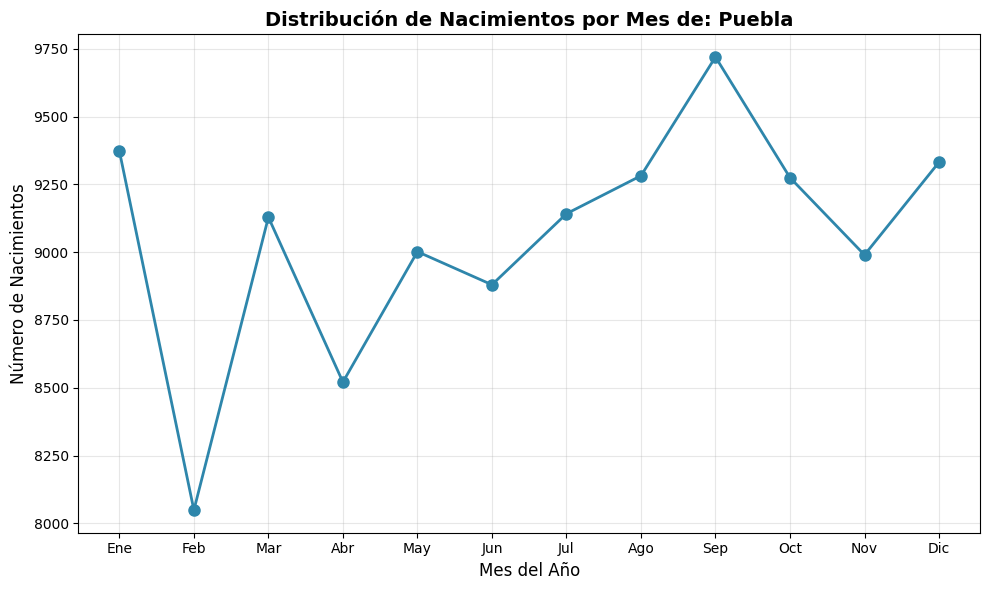

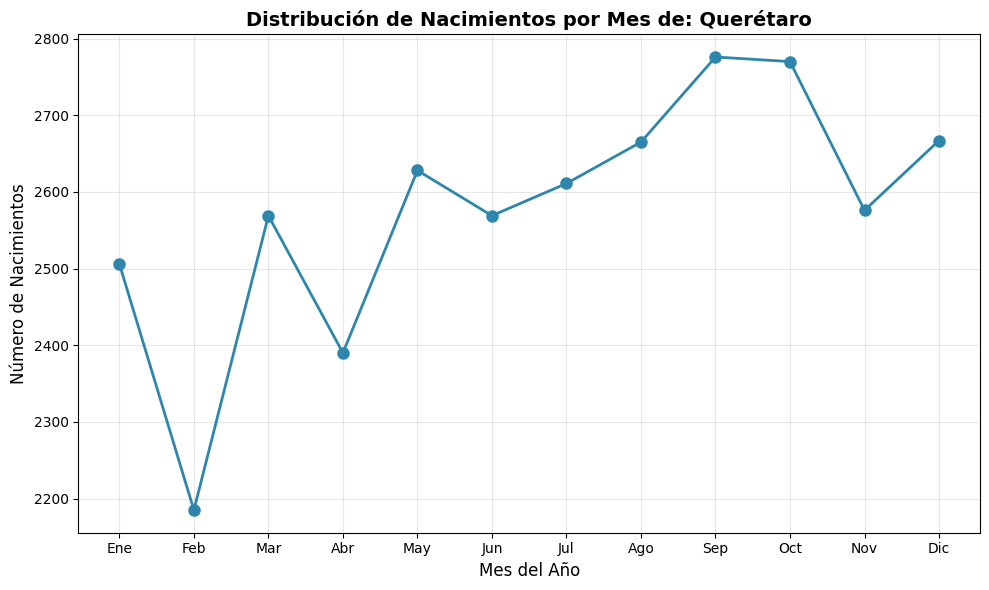

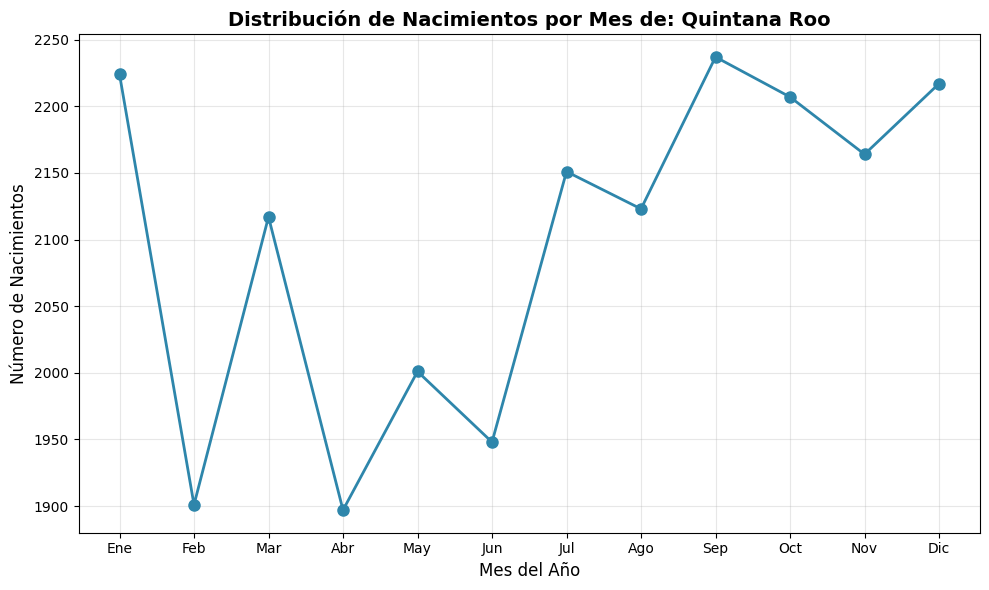

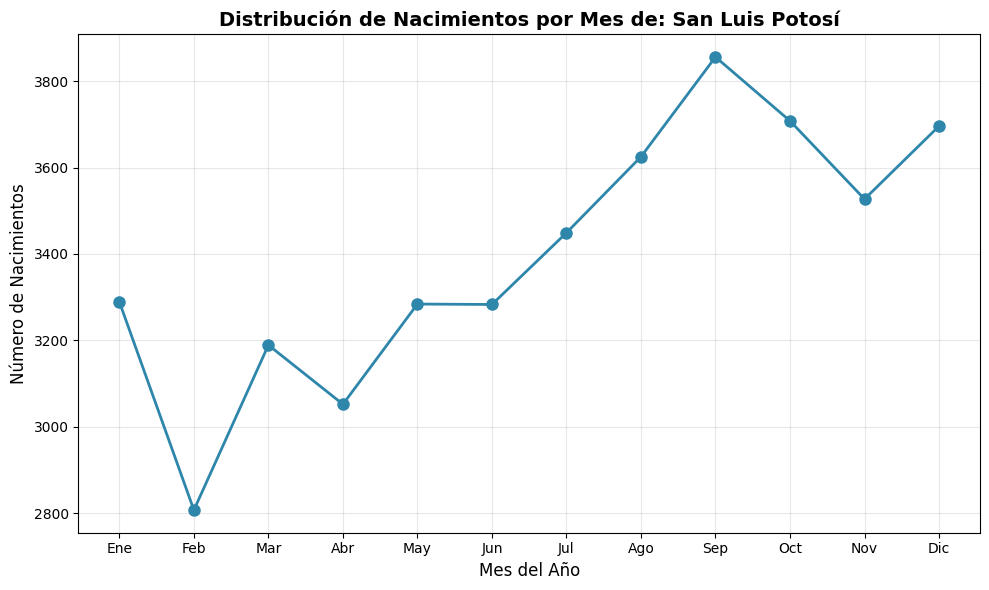

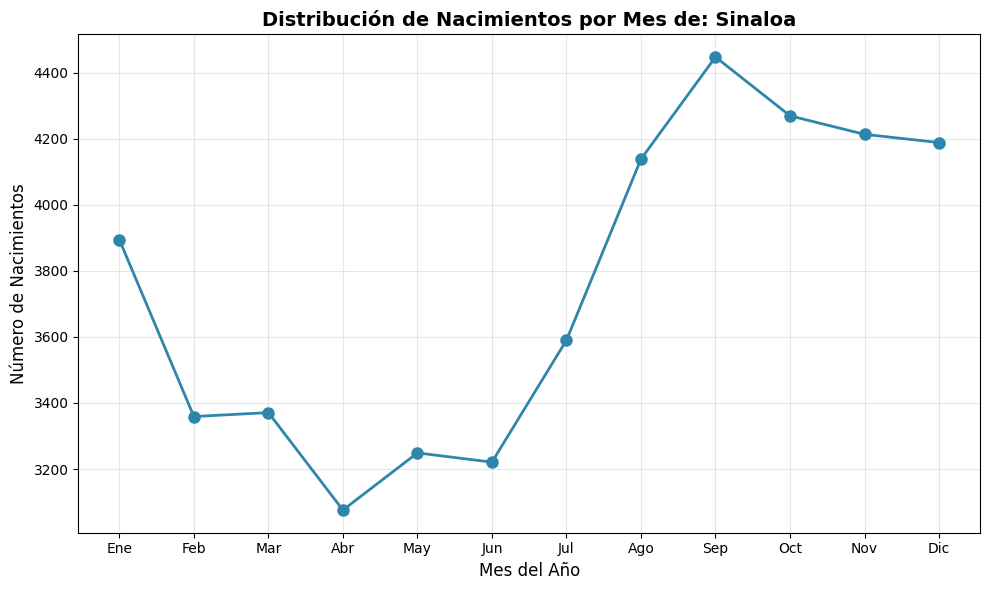

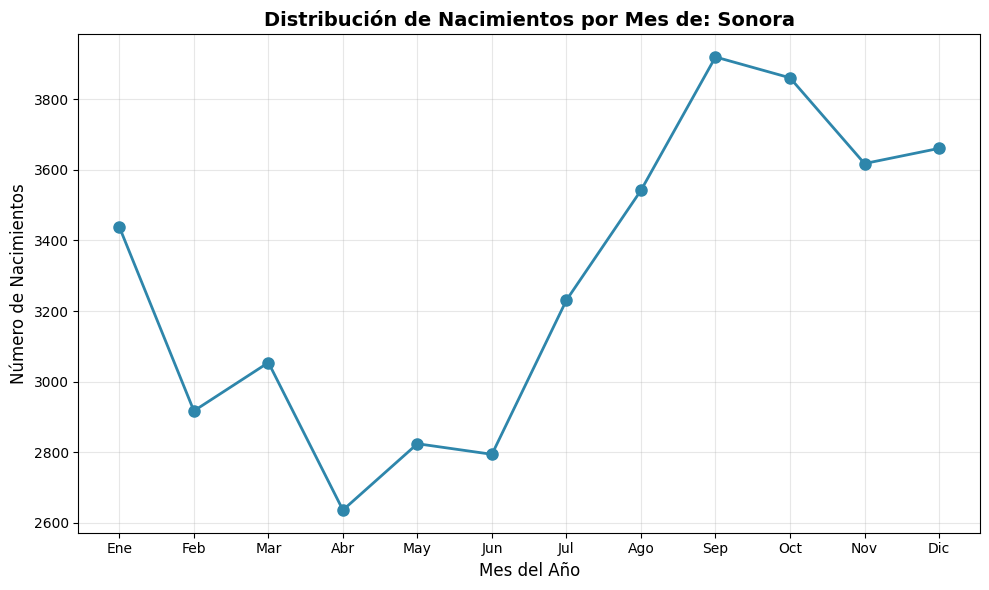

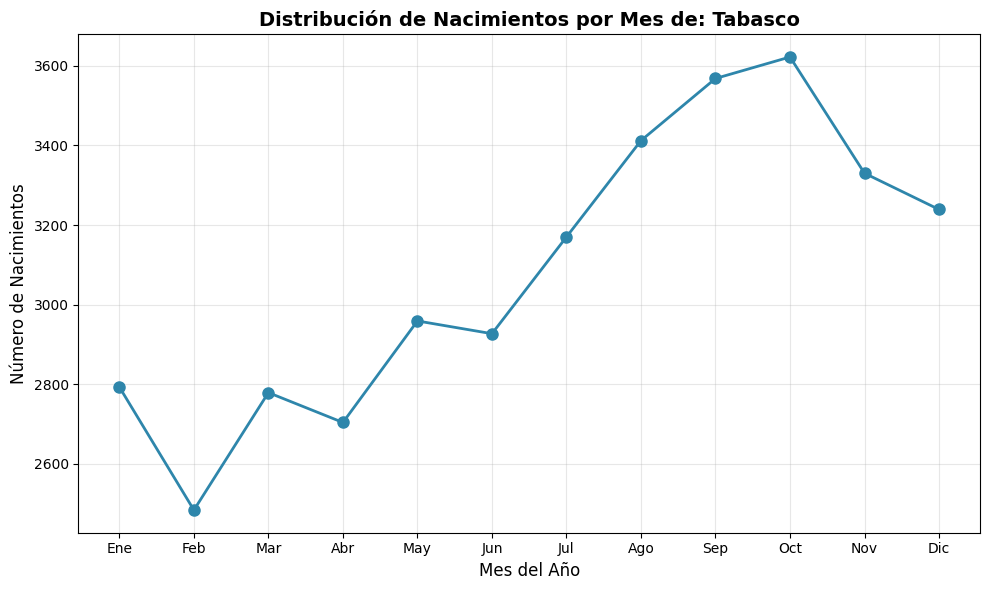

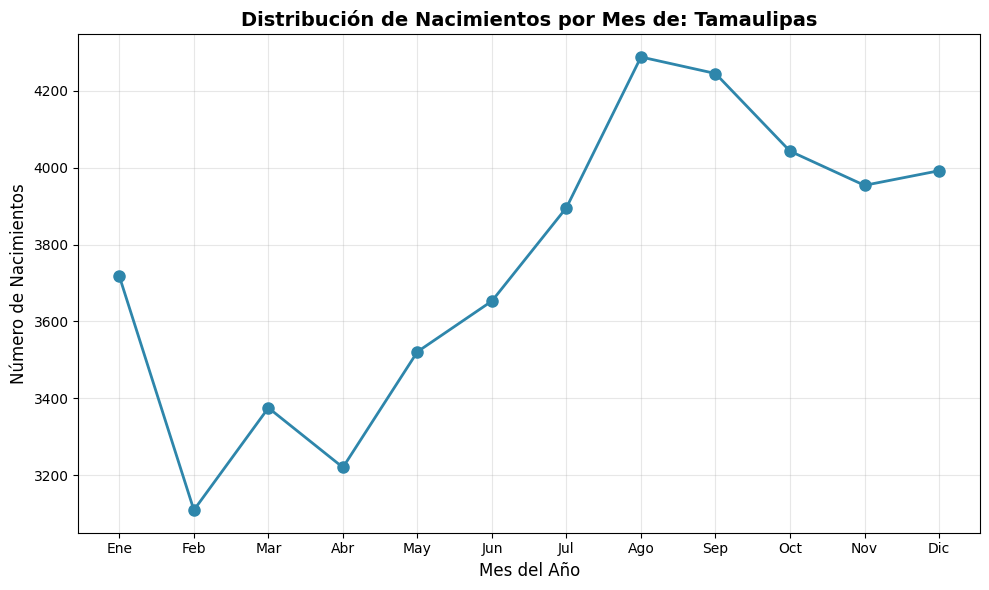

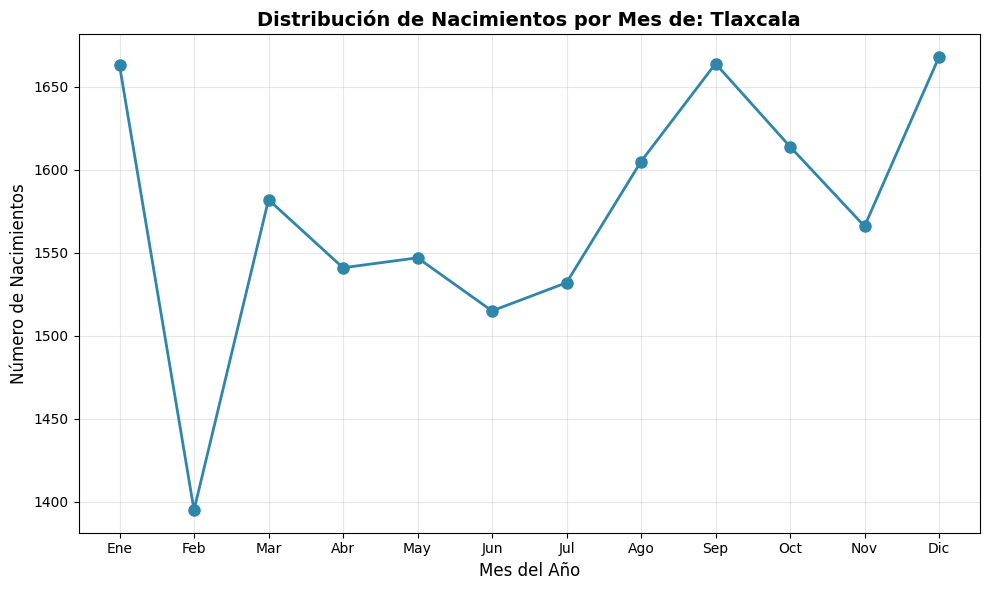

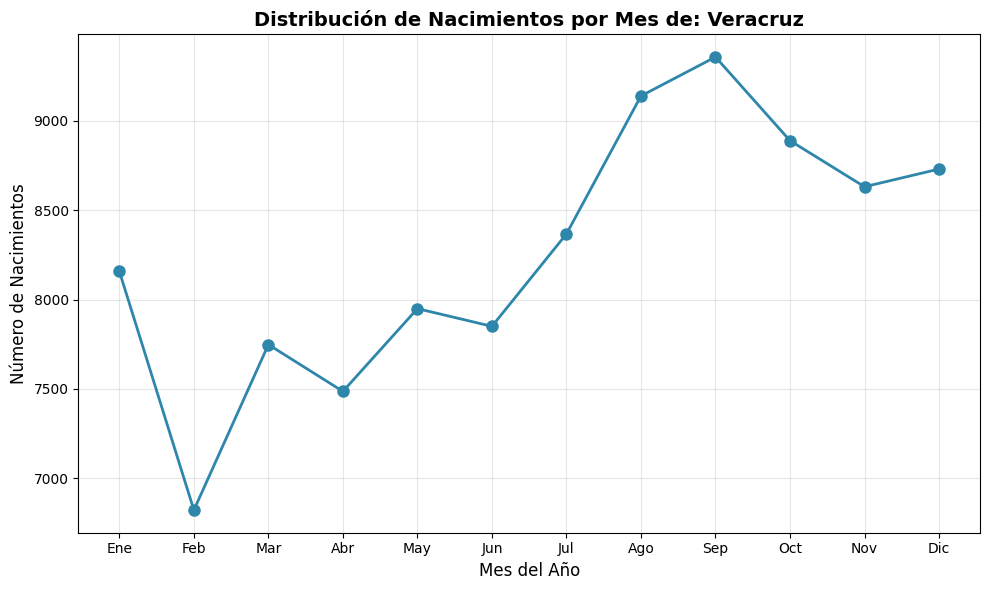

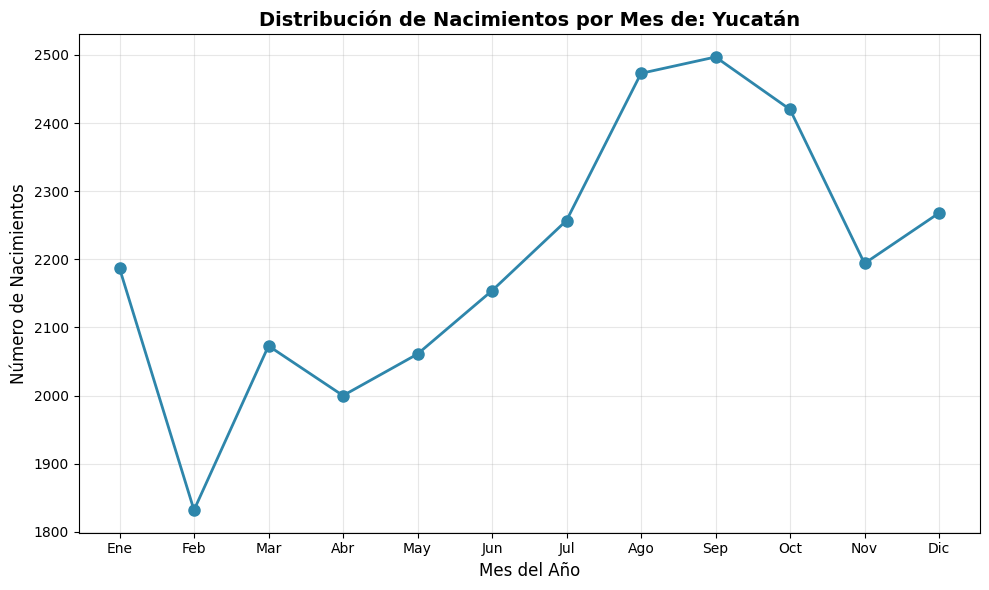

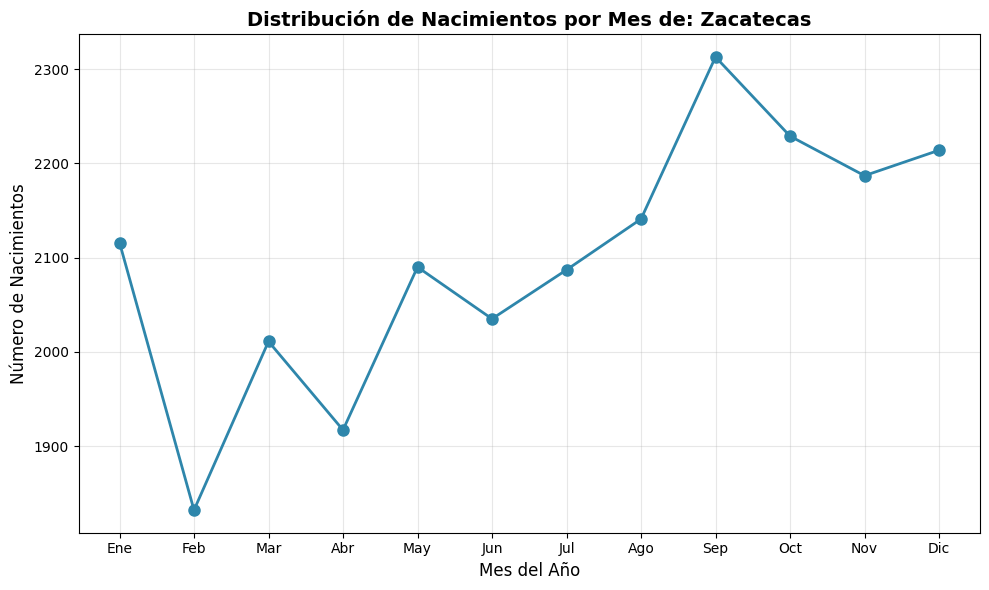

In [1]:
#Combinacion de Codigos 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Crear carpeta para guardar las gráficas
if not os.path.exists('graficas'):
    os.makedirs('graficas')

data=pd.read_csv("conjunto_de_datos_enr2023_csv/conjunto_de_datos/conjunto_de_datos_enr2023.csv")
data = data[['ent_regis', 'sexo', 'edad_reg', 'edad_madn', 'edad_padn', 'dia_nac', 'mes_nac', 'ano_nac']].copy()
# Set display option to avoid scientific notation
data['dif_edad']=data['edad_padn']-data['edad_madn']
pd.set_option('display.float_format', lambda x: '%.0f' % x)

data['fecha_nacimiento'] = pd.to_datetime(
    data['ano_nac'].astype(str) + '-' +
    data['mes_nac'].astype(str) + '-' +
    data['dia_nac'].astype(str),
    errors='coerce' # 'coerce' convertirá los valores inválidos a NaT (Not a Time)
)


data['edad_reg'] = data['edad_reg'].replace({98: np.nan, 99: np.nan})
data['edad_madn'] = data['edad_madn'].replace({98: np.nan, 99: np.nan})
data['edad_padn'] = data['edad_padn'].replace({98: np.nan, 99: np.nan})
data['dia_nac'] = data['dia_nac'].replace({98: np.nan, 99: np.nan})
data['mes_nac'] = data['mes_nac'].replace({98: np.nan, 99: np.nan})
data['ano_nac'] = data['ano_nac'].replace({9999: np.nan})


federal_entities = {
    1: "Aguascalientes",
    2: "Baja California",
    3: "Baja California Sur",
    4: "Campeche",
    5: "Coahuila",
    6: "Colima",
    7: "Chiapas",
    8: "Chihuahua",
    9: "Ciudad de México",
    10: "Durango",
    11: "Guanajuato",
    12: "Guerrero",
    13: "Hidalgo",
    14: "Jalisco",
    15: "Edo. de México",
    16: "Michoacán",
    17: "Morelos",
    18: "Nayarit",
    19: "Nuevo León",
    20: "Oaxaca",
    21: "Puebla",
    22: "Querétaro",
    23: "Quintana Roo",
    24: "San Luis Potosí",
    25: "Sinaloa",
    26: "Sonora",
    27: "Tabasco",
    28: "Tamaulipas",
    29: "Tlaxcala",
    30: "Veracruz",
    31: "Yucatán",
    32: "Zacatecas"
}

for clave, entidad in federal_entities.items():

    filtered_data = data[data['ent_regis']==clave] 
    # --- CALCULAR Y MOSTRAR LAS ESTADÍSTICAS ---

    print(f'\n--- Entidad Federativa: {entidad} ---')
    # Calcula el promedio de la diferencia de edad
    promedio_dif_edad = filtered_data['dif_edad'].mean()
    print(f"--- Promedio de Diferencia de Edad (Padre - Madre): {promedio_dif_edad:.2f} años ---")

    print("--- Estadísticas para Edad del Padre al Nacimiento (edad_padn) ---")
    promedio_edad_padn = filtered_data['edad_padn'].mean()
    min_edad_padn = filtered_data['edad_padn'].min()
    max_edad_padn = filtered_data['edad_padn'].max()
    count_edad_padn = filtered_data['edad_padn'].count() # Para saber cuántos valores se usaron

    print(f"  Promedio: {promedio_edad_padn:.2f} años")
    print(f"  Mínimo: {min_edad_padn:.0f} años") # .0f para mostrar enteros, ya que las edades suelen serlo
    print(f"  Máximo: {max_edad_padn:.0f} años")
    print(f"  Número de valores válidos: {count_edad_padn}")

    print("\n--- Estadísticas para Edad de la Madre al Nacimiento (edad_madn) ---")
    promedio_edad_madn = filtered_data['edad_madn'].mean()
    min_edad_madn = filtered_data['edad_madn'].min()
    max_edad_madn = filtered_data['edad_madn'].max()
    count_edad_madn = filtered_data['edad_madn'].count() # Para saber cuántos valores se usaron

    print(f"  Promedio: {promedio_edad_madn:.2f} años")
    print(f"  Mínimo: {min_edad_madn:.0f} años")
    print(f"  Máximo: {max_edad_madn:.0f} años")
    print(f"  Número de valores válidos: {count_edad_madn}")


    print(f"\n--- Distribución de Nacimientos por Mes para {entidad} ---")
    # Extraer el mes del año para la distribución mensual
    filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month

    # Contar nacimientos por mes
    monthly_counts = filtered_data['mes'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    # Crear gráfico de línea con puntos
    plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
    plt.title(f'Distribución de Nacimientos por Mes de: {entidad}', fontsize=14, fontweight='bold')
    plt.xlabel('Mes del Año', fontsize=12)
    plt.ylabel('Número de Nacimientos', fontsize=12)
    plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Guardar la gráfica en alta resolución
    nombre_archivo = f'graficas/{entidad}.png'
    plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
    print(f"Gráfica guardada como: {nombre_archivo}")


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

# Crear carpeta para guardar las gráficas
if not os.path.exists('graficas'):
    os.makedirs('graficas')

data=pd.read_csv("conjunto_de_datos_enr2023_csv/conjunto_de_datos/conjunto_de_datos_enr2023.csv")
data = data[['ent_regis', 'sexo', 'edad_reg', 'edad_madn', 'edad_padn', 'dia_nac', 'mes_nac', 'ano_nac']].copy()
# Set display option to avoid scientific notation
data['dif_edad']=data['edad_padn']-data['edad_madn']
pd.set_option('display.float_format', lambda x: '%.0f' % x)

data['fecha_nacimiento'] = pd.to_datetime(
    data['ano_nac'].astype(str) + '-' +
    data['mes_nac'].astype(str) + '-' +
    data['dia_nac'].astype(str),
    errors='coerce' # 'coerce' convertirá los valores inválidos a NaT (Not a Time)
)

data['edad_reg'] = data['edad_reg'].replace({98: np.nan, 99: np.nan})
data['edad_madn'] = data['edad_madn'].replace({98: np.nan, 99: np.nan})
data['edad_padn'] = data['edad_padn'].replace({98: np.nan, 99: np.nan})
data['dia_nac'] = data['dia_nac'].replace({98: np.nan, 99: np.nan})
data['mes_nac'] = data['mes_nac'].replace({98: np.nan, 99: np.nan})
data['ano_nac'] = data['ano_nac'].replace({9999: np.nan})

federal_entities = {
    1: "Aguascalientes",
    2: "Baja California",
    3: "Baja California Sur",
    4: "Campeche",
    5: "Coahuila",
    6: "Colima",
    7: "Chiapas",
    8: "Chihuahua",
    9: "Ciudad de México",
    10: "Durango",
    11: "Guanajuato",
    12: "Guerrero",
    13: "Hidalgo",
    14: "Jalisco",
    15: "Edo. de México",
    16: "Michoacán",
    17: "Morelos",
    18: "Nayarit",
    19: "Nuevo León",
    20: "Oaxaca",
    21: "Puebla",
    22: "Querétaro",
    23: "Quintana Roo",
    24: "San Luis Potosí",
    25: "Sinaloa",
    26: "Sonora",
    27: "Tabasco",
    28: "Tamaulipas",
    29: "Tlaxcala",
    30: "Veracruz",
    31: "Yucatán",
    32: "Zacatecas"
}

# Diccionario para almacenar todos los resultados
resultados_json = {
    "fecha_procesamiento": pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
    "entidades_federativas": {}
}

for clave, entidad in federal_entities.items():
    filtered_data = data[data['ent_regis']==clave] 
    
    print(f'\n--- Entidad Federativa: {entidad} ---')
    
    # Calcular estadísticas
    promedio_dif_edad = filtered_data['dif_edad'].mean()
    promedio_edad_padn = filtered_data['edad_padn'].mean()
    min_edad_padn = filtered_data['edad_padn'].min()
    max_edad_padn = filtered_data['edad_padn'].max()
    count_edad_padn = filtered_data['edad_padn'].count()
    
    promedio_edad_madn = filtered_data['edad_madn'].mean()
    min_edad_madn = filtered_data['edad_madn'].min()
    max_edad_madn = filtered_data['edad_madn'].max()
    count_edad_madn = filtered_data['edad_madn'].count()
    
    # Distribución mensual
    filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month
    monthly_counts = filtered_data['mes'].value_counts().sort_index()
    
    # Crear gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
    plt.title(f'Distribución de Nacimientos por Mes de: {entidad}', fontsize=14, fontweight='bold')
    plt.xlabel('Mes del Año', fontsize=12)
    plt.ylabel('Número de Nacimientos', fontsize=12)
    plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Guardar la gráfica
    nombre_archivo = f'graficas/{entidad}.png'
    plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
    plt.close()  # Cerrar la figura para liberar memoria
    
    # Almacenar datos en el diccionario JSON
    resultados_json["entidades_federativas"][entidad] = {
        "estadisticas_padre": {
            "promedio_edad": round(promedio_edad_padn, 2) if not pd.isna(promedio_edad_padn) else None,
            "edad_minima": int(min_edad_padn) if not pd.isna(min_edad_padn) else None,
            "edad_maxima": int(max_edad_padn) if not pd.isna(max_edad_padn) else None,
            "total_registros_validos": int(count_edad_padn)
        },
        "estadisticas_madre": {
            "promedio_edad": round(promedio_edad_madn, 2) if not pd.isna(promedio_edad_madn) else None,
            "edad_minima": int(min_edad_madn) if not pd.isna(min_edad_madn) else None,
            "edad_maxima": int(max_edad_madn) if not pd.isna(max_edad_madn) else None,
            "total_registros_validos": int(count_edad_madn)
        },
        "diferencia_edad": {
            "promedio_padre_minus_madre": round(promedio_dif_edad, 2) if not pd.isna(promedio_dif_edad) else None
        },
        "archivo_grafico": nombre_archivo
    }
    
    # Mostrar información en consola (opcional)
    print(f"--- Promedio de Diferencia de Edad (Padre - Madre): {promedio_dif_edad:.2f} años ---")
    print(f"  Padre - Promedio: {promedio_edad_padn:.2f} años, Rango: {min_edad_padn:.0f}-{max_edad_padn:.0f}")
    print(f"  Madre - Promedio: {promedio_edad_madn:.2f} años, Rango: {min_edad_madn:.0f}-{max_edad_madn:.0f}")
    print(f"Gráfica guardada como: {nombre_archivo}")

# Guardar el JSON con todos los resultados
with open('resultados_estadisticas_nacimientos.json', 'w', encoding='utf-8') as f:
    json.dump(resultados_json, f, indent=2, ensure_ascii=False)

print(f"\n=== RESULTADOS FINALES EN JSON ===")
print(json.dumps(resultados_json, indent=2, ensure_ascii=False))
print(f"\nArchivo JSON guardado como: resultados_estadisticas_nacimientos.json")

C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['fecha_nacimiento'] = pd.to_datetime(



--- Entidad Federativa: Aguascalientes ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 11.21 años ---
  Padre - Promedio: 29.30 años, Rango: 14-75
  Madre - Promedio: 26.39 años, Rango: 13-50
Gráfica guardada como: graficas/Aguascalientes.png

--- Entidad Federativa: Baja California ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 8.28 años ---
  Padre - Promedio: 30.10 años, Rango: 12-75
  Madre - Promedio: 26.66 años, Rango: 10-50
Gráfica guardada como: graficas/Baja California.png

--- Entidad Federativa: Baja California Sur ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 9.11 años ---
  Padre - Promedio: 30.04 años, Rango: 12-74
  Madre - Promedio: 26.77 años, Rango: 12-50
Gráfica guardada como: graficas/Baja California Sur.png

--- Entidad Federativa: Campeche ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 11.00 años ---
  Padre - Promedio: 30.31 años, Rango: 12-75
  Madre - Promedio: 26.53 años, Rango: 12-50
Gráfica guardada como: graficas/Campeche.png

--- Entidad Federativa: Coahuila ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 6.76 años ---
  Padre - Promedio: 29.03 años, Rango: 12-75
  Madre - Promedio: 26.06 años, Rango: 11-50
Gráfica guardada como: graficas/Coahuila.png

--- Entidad Federativa: Colima ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 10.16 años ---
  Padre - Promedio: 30.63 años, Rango: 14-73
  Madre - Promedio: 26.81 años, Rango: 12-48
Gráfica guardada como: graficas/Colima.png

--- Entidad Federativa: Chiapas ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 9.50 años ---
  Padre - Promedio: 30.36 años, Rango: 12-75
  Madre - Promedio: 26.34 años, Rango: 10-50
Gráfica guardada como: graficas/Chiapas.png

--- Entidad Federativa: Chihuahua ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 9.96 años ---
  Padre - Promedio: 29.16 años, Rango: 12-75
  Madre - Promedio: 25.77 años, Rango: 10-50
Gráfica guardada como: graficas/Chihuahua.png

--- Entidad Federativa: Ciudad de México ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 9.05 años ---
  Padre - Promedio: 31.54 años, Rango: 13-75
  Madre - Promedio: 28.19 años, Rango: 10-50
Gráfica guardada como: graficas/Ciudad de México.png

--- Entidad Federativa: Durango ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 7.06 años ---
  Padre - Promedio: 29.61 años, Rango: 12-75
  Madre - Promedio: 26.17 años, Rango: 10-50
Gráfica guardada como: graficas/Durango.png

--- Entidad Federativa: Guanajuato ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 11.45 años ---
  Padre - Promedio: 29.43 años, Rango: 12-75
  Madre - Promedio: 26.51 años, Rango: 10-50
Gráfica guardada como: graficas/Guanajuato.png

--- Entidad Federativa: Guerrero ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 7.03 años ---
  Padre - Promedio: 29.98 años, Rango: 12-75
  Madre - Promedio: 26.21 años, Rango: 10-50
Gráfica guardada como: graficas/Guerrero.png

--- Entidad Federativa: Hidalgo ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 8.05 años ---
  Padre - Promedio: 30.10 años, Rango: 13-75
  Madre - Promedio: 26.55 años, Rango: 10-50
Gráfica guardada como: graficas/Hidalgo.png

--- Entidad Federativa: Jalisco ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 8.98 años ---
  Padre - Promedio: 30.19 años, Rango: 12-75
  Madre - Promedio: 26.76 años, Rango: 11-50
Gráfica guardada como: graficas/Jalisco.png

--- Entidad Federativa: Edo. de México ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 10.65 años ---
  Padre - Promedio: 29.41 años, Rango: 13-75
  Madre - Promedio: 26.26 años, Rango: 11-50
Gráfica guardada como: graficas/Edo. de México.png

--- Entidad Federativa: Michoacán ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 9.45 años ---
  Padre - Promedio: 30.02 años, Rango: 12-75
  Madre - Promedio: 26.49 años, Rango: 10-50
Gráfica guardada como: graficas/Michoacán.png

--- Entidad Federativa: Morelos ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 10.54 años ---
  Padre - Promedio: 30.06 años, Rango: 14-75
  Madre - Promedio: 26.46 años, Rango: 11-50
Gráfica guardada como: graficas/Morelos.png

--- Entidad Federativa: Nayarit ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 10.10 años ---
  Padre - Promedio: 30.60 años, Rango: 13-75
  Madre - Promedio: 26.60 años, Rango: 10-50
Gráfica guardada como: graficas/Nayarit.png

--- Entidad Federativa: Nuevo León ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 8.63 años ---
  Padre - Promedio: 29.90 años, Rango: 13-72
  Madre - Promedio: 27.01 años, Rango: 12-50
Gráfica guardada como: graficas/Nuevo León.png

--- Entidad Federativa: Oaxaca ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 10.87 años ---
  Padre - Promedio: 30.39 años, Rango: 12-75
  Madre - Promedio: 26.46 años, Rango: 10-50
Gráfica guardada como: graficas/Oaxaca.png

--- Entidad Federativa: Puebla ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 8.70 años ---
  Padre - Promedio: 29.32 años, Rango: 12-75
  Madre - Promedio: 26.05 años, Rango: 11-50
Gráfica guardada como: graficas/Puebla.png

--- Entidad Federativa: Querétaro ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 9.96 años ---
  Padre - Promedio: 30.37 años, Rango: 12-75
  Madre - Promedio: 27.33 años, Rango: 13-50
Gráfica guardada como: graficas/Querétaro.png

--- Entidad Federativa: Quintana Roo ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 8.23 años ---
  Padre - Promedio: 30.70 años, Rango: 14-75
  Madre - Promedio: 26.89 años, Rango: 11-50
Gráfica guardada como: graficas/Quintana Roo.png

--- Entidad Federativa: San Luis Potosí ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 10.41 años ---
  Padre - Promedio: 30.05 años, Rango: 12-75
  Madre - Promedio: 26.81 años, Rango: 10-50
Gráfica guardada como: graficas/San Luis Potosí.png

--- Entidad Federativa: Sinaloa ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 10.78 años ---
  Padre - Promedio: 30.57 años, Rango: 12-75
  Madre - Promedio: 26.98 años, Rango: 10-50
Gráfica guardada como: graficas/Sinaloa.png

--- Entidad Federativa: Sonora ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 10.90 años ---
  Padre - Promedio: 29.90 años, Rango: 12-75
  Madre - Promedio: 26.38 años, Rango: 10-50
Gráfica guardada como: graficas/Sonora.png

--- Entidad Federativa: Tabasco ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 9.55 años ---
  Padre - Promedio: 30.51 años, Rango: 13-75
  Madre - Promedio: 26.30 años, Rango: 12-50
Gráfica guardada como: graficas/Tabasco.png

--- Entidad Federativa: Tamaulipas ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 9.61 años ---
  Padre - Promedio: 29.93 años, Rango: 12-75
  Madre - Promedio: 26.47 años, Rango: 12-50
Gráfica guardada como: graficas/Tamaulipas.png

--- Entidad Federativa: Tlaxcala ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 7.16 años ---
  Padre - Promedio: 29.12 años, Rango: 14-75
  Madre - Promedio: 26.02 años, Rango: 10-49
Gráfica guardada como: graficas/Tlaxcala.png

--- Entidad Federativa: Veracruz ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 10.83 años ---
  Padre - Promedio: 30.29 años, Rango: 12-75
  Madre - Promedio: 26.33 años, Rango: 11-50
Gráfica guardada como: graficas/Veracruz.png

--- Entidad Federativa: Yucatán ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 8.30 años ---
  Padre - Promedio: 29.76 años, Rango: 13-75
  Madre - Promedio: 26.82 años, Rango: 11-50
Gráfica guardada como: graficas/Yucatán.png

--- Entidad Federativa: Zacatecas ---


C:\Users\User\AppData\Local\Temp\ipykernel_12776\718167163.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mes'] = filtered_data['fecha_nacimiento'].dt.month


--- Promedio de Diferencia de Edad (Padre - Madre): 6.59 años ---
  Padre - Promedio: 29.84 años, Rango: 12-75
  Madre - Promedio: 26.75 años, Rango: 10-50
Gráfica guardada como: graficas/Zacatecas.png

=== RESULTADOS FINALES EN JSON ===
{
  "fecha_procesamiento": "2025-07-05 21:01:17",
  "entidades_federativas": {
    "Aguascalientes": {
      "estadisticas_padre": {
        "promedio_edad": 29.3,
        "edad_minima": 14,
        "edad_maxima": 75,
        "total_registros_validos": 15890
      },
      "estadisticas_madre": {
        "promedio_edad": 26.39,
        "edad_minima": 13,
        "edad_maxima": 50,
        "total_registros_validos": 18324
      },
      "diferencia_edad": {
        "promedio_padre_minus_madre": 11.21
      },
      "archivo_grafico": "graficas/Aguascalientes.png"
    },
    "Baja California": {
      "estadisticas_padre": {
        "promedio_edad": 30.1,
        "edad_minima": 12,
        "edad_maxima": 75,
        "total_registros_validos": 47000
     